<a href="https://colab.research.google.com/github/SiPilip/pytorch_course/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 02. Neural Network classification with pytorch

In [193]:
## 1. Buat klasifikasi data

In [194]:
import sklearn

In [195]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

In [196]:
len(X), len(y)

(1000, 1000)

In [197]:
print('First samples of X')
X[:5]

First samples of X


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [198]:
print('First samples of y')
y[:5]

First samples of y


array([1, 1, 1, 1, 0])

In [199]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


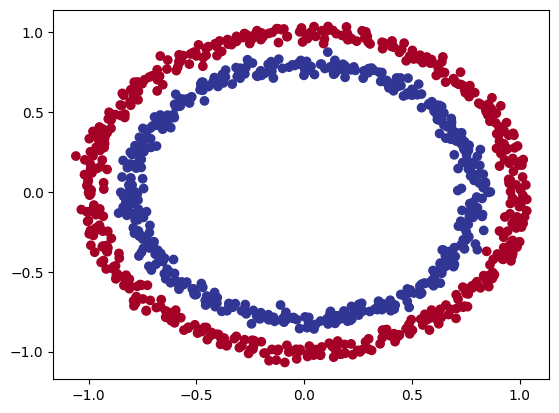

In [200]:
# Visualisasi
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Note:** Data yang kita pakai adalah data yang sering dimaksud sebagai dataset mainan. Sebuah dataset yang cukup kecil untuk melakukan eksperimen tapi masih tetap cukup bisa untuk diubah volumenya untuk praktik hal fundamental

### 1.1 Check input and output shapes

In [201]:
X.shape, y.shape

((1000, 2), (1000,))

In [202]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [203]:
# Melihat contoh pertama dari fitur dan label
X_sample = X[0]
y_sample = y[0]

print(f" Value untuk satu sample dari X: {X_sample} dan yang sama untuk y:{y_sample}")
print(f" Bentuk untuk satu sample dari X: {X_sample.shape} dan yang sama untuk y:{y_sample.shape}")

 Value untuk satu sample dari X: [0.75424625 0.23148074] dan yang sama untuk y:1
 Bentuk untuk satu sample dari X: (2,) dan yang sama untuk y:()


### 1.2 Ubah data menjadi bentuk tensors dan bagi data train dan data test

In [204]:
import torch
torch.__version__

'2.5.1+cu124'

In [205]:
# Ubah data menjadi bentuk tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [206]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [207]:
# Bagi data menjadi data latih dan data tes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [208]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [209]:
n_samples

1000

## 2. Building a model

Buat model untuk mengklasifikasi data biru dan merah

Langkah:
1. Setup device agnostic untuk berjalan dengan menggunakan GPU
2. bangun sebuah model dengan subclassing 'nn.Module'
3. Definisikan loss function and optimizer
4. Buat training dan test loop

In [210]:
# Import PyTorch and nn
import torch
from torch import nn

# Buat device agnostic
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [211]:
X_train.shape

torch.Size([800, 2])

In [212]:
y_train[:5]

tensor([1., 0., 1., 0., 1.])

# Buat model

1. Subclasses `nn.Module` (hampir semua model dalam pyTorch menggunakan subclass `nn.Module`)
2. Create 2 `nn.Linear()` layer yang memiliki kapabilitas untuk handle bentuk bentuk data
3. Definisikan fungsi `forward()` metode yang outine the forward pass (or forward computation)
4. Instatiate an instance dari kelas odel dan kirimkan ke target device

In [213]:
# 1. Bangun model dengan subclass nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Buat 2 nn.Linear layer yang memiliki kapabilitas untuk menghandle bentuk dari data
    self.layer_1 = nn.Linear(in_features=2, # ambil 2 fitur untuk dikonversi menjadi 5 fitur
                             out_features=5)
    self.layer_2 = nn.Linear(in_features=5, # ambil 5 fitur dari layer sebelumnya untuk mengelukarkan satu fitur saja
                             out_features=1)

    # self.two_linear_layyers = nn.Sequential(
    #     nn.Linear(in_features = 2, out_features=5),
    #     nn.Linear(in_features=5, out_features=1)
    # )

    # 3. Definisikan forward() metode outline untuk fungsi forward
    def forward(self,x):
      return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
      # return two_linear_layers

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [214]:
device

next(model_0.parameters())

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188]], device='cuda:0', requires_grad=True)

In [215]:
# Mari replicate model using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features =2, out_features = 5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [216]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [217]:
# Make predictions
untrained_preds = model_0(X_test.to(device))
print(f"Panjang data prediksi: {len(untrained_preds)}, Bentuk: {untrained_preds.shape}")
print(f"Panjang data test: {len(X_test)}, Shape: {X_test.shape}")
print(f"10 data prediksi pertama: {untrained_preds[:10]}")
print(f"First 10 labels: {y_test[:10]}")

Panjang data prediksi: 200, Bentuk: torch.Size([200, 1])
Panjang data test: 200, Shape: torch.Size([200, 2])
10 data prediksi pertama: tensor([[-0.0194],
        [ 0.1209],
        [ 0.3019],
        [ 0.0013],
        [ 0.1378],
        [-0.0005],
        [-0.0356],
        [-0.0813],
        [ 0.2756],
        [-0.0028]], device='cuda:0', grad_fn=<SliceBackward0>)
First 10 labels: tensor([0., 0., 0., 0., 1., 1., 0., 0., 1., 1.])


### 2.1 Setup loss function and optimizer

Apa loss function dan optimizer yang bisa kita gunakan?

Untuk regression kita bisa menggunakan MAE (Mean Absolute Error) atau MSE (Mean Squared Error)

Untuk klasifikasii kita mungkin menggunakan binaryy cross entropyy atau categorical cross entropy

Sebagai pengingat loss function mengukut tingkat kesalahan yang diibuat oleh model kita

Untuk optimisasii, kita akan membangun sesuatu yang cukup umum dan dapat digunakan seperti SGD atau Adam. meskipun begitu PyTorch mempunyai banyak pilihan built-in lainnya

* Untuk loss function kita akan menggunakan ,torch.nn.BECWithLogitsLoss()`, for more on what binary cross entropy (BCE)



In [218]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [219]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct /len(y_pred)) * 100
  return acc

### 3. Train Model

untuk melatih model kita, kita akan memutuhkan langkah berikut

1. Forward pass
2. Hitung loss
3. Optimisasi zero grad
4. Loss backward dengan backpropagation
5. Optimisasi (gradien descent)

### 3.1 Dari Raw Logits -> Probabilitas Prediction -> Label Prediksi

Model outtput kita akan menjadi **logits** mentah

Kita bisa mengkonversi **logits** menjadii probabilitas prediksi dengan melempar sebuah fungsi aktivasi (seperti sigmoid untuk binary crossentropy dan softmax multiclass klasifikasi)

Lalu kita akan mentkonversi prediksi pbabilitas kita menjadi label prediksii dengan membulatkan dan mengambil `argmax()`

In [220]:
# Lihat 5 keluaran pertama dengan forward pass dengan test data
model_0.eval()

with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0194],
        [ 0.1209],
        [ 0.3019],
        [ 0.0013],
        [ 0.1378]], device='cuda:0')

In [221]:
y_test[:5]

tensor([0., 0., 0., 0., 1.])

In [222]:
# gunakan aktivasi sigmoid pada model logits untuk mengubahnyya menjadi prediksi probabilitas
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4952],
        [0.5302],
        [0.5749],
        [0.5003],
        [0.5344]], device='cuda:0')

Untuk nilai prediksi probabilitas, kita harus menggunakan pembulatan pada mereka

* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5 `y=0` (class 0)

In [223]:
# Find the predicted labels

y_preds = torch.round(y_pred_probs)

# In Full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Chech equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#Get rid of extra diimention
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 1., 1., 1., 1.], device='cuda:0')

### 3.2 Membangun training and testing loop

In [224]:
torch.cuda.manual_seed(42)

# Tentukan epochs
epochs = 100

# Letakkan data pada target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Bangun training dan evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # ubah logits -> pred probs -> pred labels

  # 2. Calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits),
  #                y_train)
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss mengharapkan raw logits sebagai inputnya
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimzer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.5f}")

Epoch: 0 | Loss: 0.69714, Acc: 53.25 | Test loss: 0.69770, Test acc: 52.50000
Epoch: 10 | Loss: 0.69509, Acc: 51.75 | Test loss: 0.69647, Test acc: 52.50000
Epoch: 20 | Loss: 0.69417, Acc: 51.00 | Test loss: 0.69597, Test acc: 50.50000
Epoch: 30 | Loss: 0.69371, Acc: 50.50 | Test loss: 0.69572, Test acc: 49.50000
Epoch: 40 | Loss: 0.69344, Acc: 50.00 | Test loss: 0.69556, Test acc: 49.00000
Epoch: 50 | Loss: 0.69328, Acc: 50.38 | Test loss: 0.69544, Test acc: 47.00000
Epoch: 60 | Loss: 0.69317, Acc: 50.12 | Test loss: 0.69534, Test acc: 47.50000
Epoch: 70 | Loss: 0.69309, Acc: 50.38 | Test loss: 0.69527, Test acc: 47.50000
Epoch: 80 | Loss: 0.69304, Acc: 50.00 | Test loss: 0.69521, Test acc: 45.50000
Epoch: 90 | Loss: 0.69300, Acc: 50.75 | Test loss: 0.69517, Test acc: 44.50000


## 4. Buat prediksi dan evaluasi modelnya

Dari metrik terlihat bahwa model kita tidak belajar apapun

Untuk menganalisisnya mari membuat prediksi dan buat visualisasinya

Untuk melakukannya kita akan memanggil fungsi yakni `plot_decision_boundary()`

In [225]:
import requests
from pathlib import Path

# Unduh fungsi pembantu dari repo Learn Pytorch
if Path("helper_funciton.py").is_file():
  print("helper_function.py sudah ada!")
else:
  print("Mengunduh helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", 'wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Mengunduh helper_functions.py


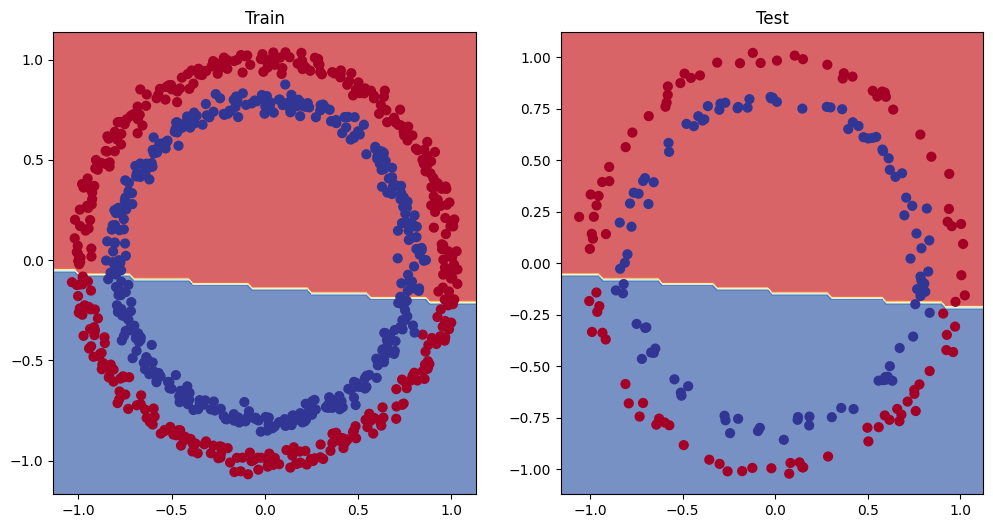

In [226]:
# Plot decision boundary dr model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test, y_test)

## 5. Improvisasi model

* Tambahkan layers - untuk memberikan model kesempatan mempelajari pola dari data
* Tambahkan unit tersembunyi - dari 5 hidden unit ke 10 hidden unit
* Perbanyak epochs
* Merubah fungsi aktiviasi
* Merubah learning rate (dari 0.01)
* Merubah fungsi loss

Opsi ini adalah semuanya dari perspektif model karena permasalahn ini bermasalah pada model daripada datanya

Dan karena opsi ini, kita menggunakan teknik *hyyperparameters*

* nambahin hidden units dari 5 -> 10
* Nambahin layer dari 2 -> 3
* Nambahin epochs 100 -> 1000

In [227]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_2(z)
    # return z

    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)

model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [228]:
# Membuat fungsi loss
loss_fn = nn.BCEWithLogitsLoss()

# Membuat optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [229]:
# Menulis training dan evaluasi loop untuk model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# latih lebih lama
epochs = 1000

# Letakkan data pada target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Calculate the loss/acc
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Tampilkan
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.5f}")

Epoch: 0 | Loss: 0.69708, Acc: 49.75 | Test loss: 0.69613, Test acc: 51.00000
Epoch: 100 | Loss: 0.69296, Acc: 50.75 | Test loss: 0.69482, Test acc: 46.00000
Epoch: 200 | Loss: 0.69291, Acc: 49.62 | Test loss: 0.69514, Test acc: 47.50000
Epoch: 300 | Loss: 0.69290, Acc: 50.88 | Test loss: 0.69524, Test acc: 43.50000
Epoch: 400 | Loss: 0.69290, Acc: 50.50 | Test loss: 0.69527, Test acc: 44.00000
Epoch: 500 | Loss: 0.69290, Acc: 50.62 | Test loss: 0.69528, Test acc: 44.00000
Epoch: 600 | Loss: 0.69290, Acc: 50.62 | Test loss: 0.69528, Test acc: 44.00000
Epoch: 700 | Loss: 0.69290, Acc: 50.62 | Test loss: 0.69528, Test acc: 44.00000
Epoch: 800 | Loss: 0.69290, Acc: 50.62 | Test loss: 0.69529, Test acc: 44.00000
Epoch: 900 | Loss: 0.69290, Acc: 50.62 | Test loss: 0.69529, Test acc: 44.00000


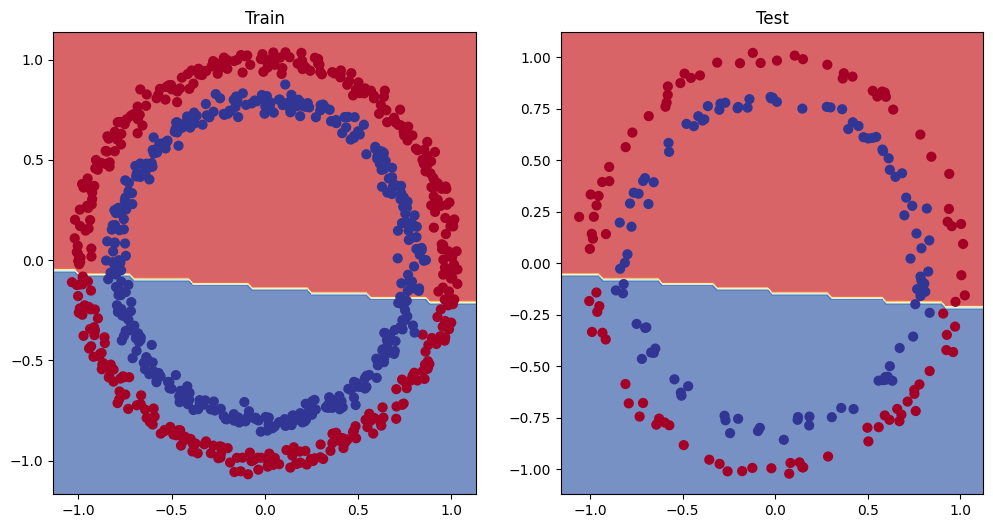

In [230]:
# Plot decision boundary dr model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test, y_test)

### 5.1 Menyiapkan data untuk melihat apakah model kita dapat muat di garis lurus

Satu cara untuk toubleshooting masalah ini

In [231]:
#  Buat beberapa data
weight = 0.7
bias = 0.3
start = 0
end = 1

step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

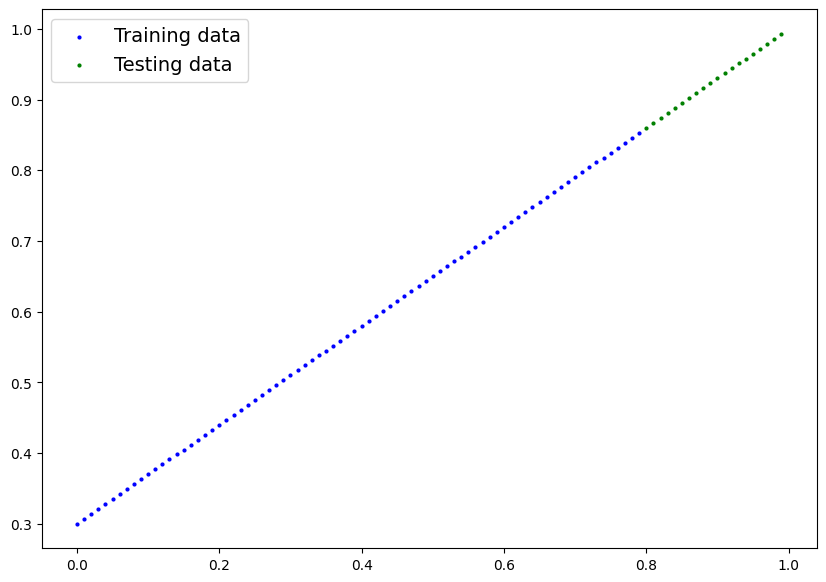

In [232]:
# Buat train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_reggression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

plot_predictions(train_data = X_train_regression,
                 train_labels=y_train_reggression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [233]:
X_train_regression[0]

tensor([0.])

### 5.2 Adjusting `model_1` untuk fit dengan garis lurus

In [234]:
# arsitketur yang sama dengan model_1
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

In [235]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr=0.01)

In [236]:
# Training the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Tetapkan epochs
epochs = 1000

# Put the data on target device
X_train_regression, y_train_reggression = X_train_regression.to(device), y_train_reggression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_reggression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)


 # Tampilkan
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


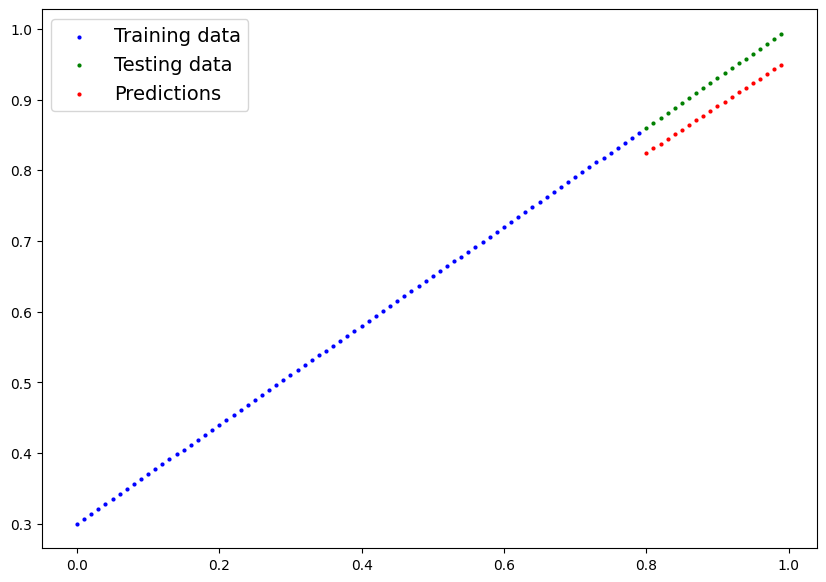

In [240]:
# Lakukan evaluasi mode
model_2.eval()

# Buat prediksi
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data and predicitions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_reggression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())